In [2]:
from tensorflow.keras.layers import Dense,
from keras.utils import to_categorical
from tensorflow.keras.layers import Flatten


In [3]:
from keras.datasets import mnist
from keras.models import Sequential

In [8]:
import matplotlib.pyplot as plt

In [24]:
import numpy as np

In [5]:
(trainx,trainy),(testx,testy)=mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [6]:
trainx.shape

(60000, 28, 28)

In [7]:
testx.shape

(10000, 28, 28)

In [27]:
trainx=trainx.reshape((60000, 784))
testx=testx.reshape((10000, 784))

In [16]:
trainy=to_categorical(trainy)
testy=to_categorical(testy)

In [17]:
trainx=trainx.astype('float32')/255.0
testx=testx.astype('float32')/255.0

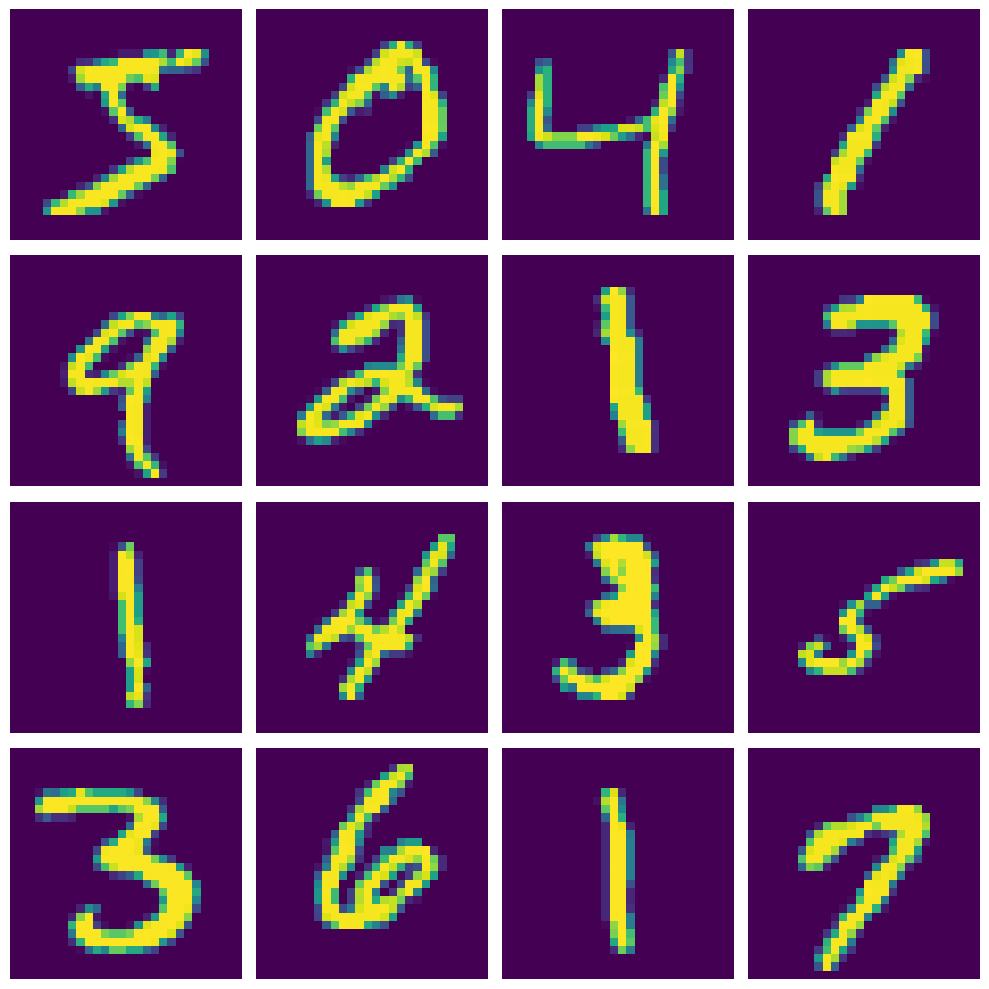

In [18]:
fig,axs=plt.subplots(4,4,figsize=(10,10))
for i in range(16):
  r=i//4
  c=i%4
  ax=axs[r,c]
  ax.imshow(trainx[i])
  ax.axis('off')
plt.tight_layout()
plt.show()

In [30]:
model=Sequential()
model.add(Dense(512,activation='relu',input_shape=(784,)))
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 512)               401920    
                                                                 
 dense_11 (Dense)            (None, 256)               131328    
                                                                 
 dense_12 (Dense)            (None, 128)               32896     
                                                                 
 dense_13 (Dense)            (None, 64)                8256      
                                                                 
 dense_14 (Dense)            (None, 10)                650       
                                                                 
Total params: 575,050
Trainable params: 575,050
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [32]:
history=model.fit(trainx, np.argmax(trainy, axis=1),epochs=5,batch_size=32,validation_split=0.1)

Epoch 1/5
1688/1688 [==============================] - 22s 13ms/step - loss: 0.2256 - accuracy: 0.9324 - val_loss: 0.0905 - val_accuracy: 0.9735
Epoch 2/5
1688/1688 [==============================] - 18s 11ms/step - loss: 0.0985 - accuracy: 0.9701 - val_loss: 0.0975 - val_accuracy: 0.9725
Epoch 3/5
1688/1688 [==============================] - 19s 11ms/step - loss: 0.0702 - accuracy: 0.9792 - val_loss: 0.0839 - val_accuracy: 0.9753
Epoch 4/5
1688/1688 [==============================] - 19s 11ms/step - loss: 0.0530 - accuracy: 0.9837 - val_loss: 0.0736 - val_accuracy: 0.9818
Epoch 5/5
1688/1688 [==============================] - 20s 12ms/step - loss: 0.0450 - accuracy: 0.9861 - val_loss: 0.0799 - val_accuracy: 0.9782


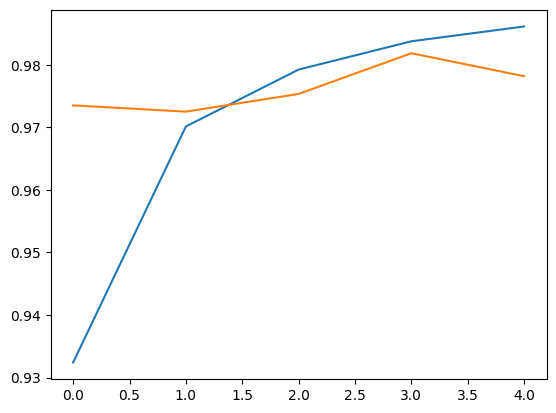

In [33]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [35]:
acc=model.evaluate(testx,np.argmax(testy, axis=1))

313/313 [==============================] - 1s 4ms/step - loss: 0.0940 - accuracy: 0.9752
